In [1]:
import matplotlib.pyplot as plt
import numpy as np

from processes.multivariate_ou import MultivariateOU

%load_ext autoreload
%autoreload 2

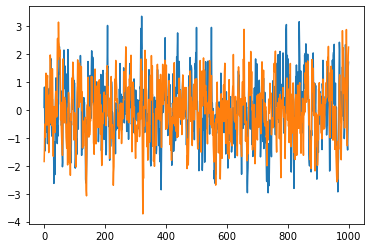

In [2]:
r = 0.5
n = 2
cov = np.array([[1, r], [r, 1]])
cov = np.ones((n, n)) * r
cov[np.diag_indices(n)] = 1

t = np.arange(0, 1000, 1)

ou = MultivariateOU(mu=0, cov=cov, tau=3)
x = ou.sample(t, shape=())

fig, ax = plt.subplots()
ax.plot(t, x[:, :3])

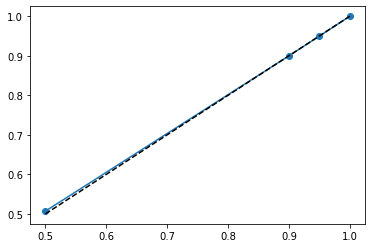

In [56]:
n = 2
t = np.arange(0, 1000, 1)

rhos = [0.5, 0.9, 0.95, 0.99999]
rhos_est = []

for rho in rhos:
    cov = np.array([[1, rho], [rho, 1]])

    ou = MultivariateOU(mu=0, cov=cov, tau=3)
    x = ou.sample(t, shape=(100,))
    rho_est = np.mean((np.mean(x[:, 0, :] * x[:, 1, :], 0) - np.mean(x[:, 0, :], 0) * np.mean(x[:, 1, :], 0)) \
                      / (np.std(x[:, 0, :], 0) * np.std(x[:, 1, :], 0)))
    rhos_est.append(rho_est)

fig, ax = plt.subplots()
ax.plot(rhos, rhos_est, '-o')
ax.plot([rhos[0], rhos[-1]], [rhos[0], rhos[-1]], 'k--')
# base = 10
# ax.set_xscale('log', base=base)
# ax.set_yscale('log', base=base)

### can't create n correlated processes where one is highly correlated with all but the rest are independent between them

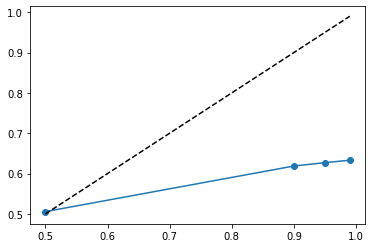

In [50]:
n = 4
t = np.arange(0, 1000, 1)

rhos = [0.5, 0.9, 0.95, 0.99]
rhos_est = []

for rho in rhos:
    cov = np.eye(n)
    cov[1:, 0] = rho
    cov[0, 1:] = rho

    ou = MultivariateOU(mu=0, cov=cov, tau=3)
    x = ou.sample(t, shape=(100,))
    rho_est = np.mean((np.mean(x[:, 0, :] * x[:, 1, :], 0) - np.mean(x[:, 0, :], 0) * np.mean(x[:, 1, :], 0)) \
                      / (np.std(x[:, 0, :], 0) * np.std(x[:, 1, :], 0)))
    rhos_est.append(rho_est)

fig, ax = plt.subplots()
ax.plot(rhos, rhos_est, '-o')
ax.plot([rhos[0], rhos[-1]], [rhos[0], rhos[-1]], 'k--')
# base = 10
# ax.set_xscale('log', base=base)
# ax.set_yscale('log', base=base)

In [51]:
np.linalg.eig(cov)

(array([ 2.7147303, -0.7147303,  1.       ,  1.       ]),
 array([[ 7.07106781e-01,  7.07106781e-01,  0.00000000e+00,
          6.42462401e-17],
        [ 4.08248290e-01, -4.08248290e-01, -5.77350269e-01,
         -5.01280412e-01],
        [ 4.08248290e-01, -4.08248290e-01,  7.88675135e-01,
         -3.07516100e-01],
        [ 4.08248290e-01, -4.08248290e-01, -2.11324865e-01,
          8.08796512e-01]]))

In [47]:
x[:, 0, :] * x[:, 1, :]

array([[ 1.14141777,  0.27250013,  0.10045734, ...,  0.50010174,
        -0.33947427,  0.92068219],
       [ 1.90981124,  2.12586222,  0.63516227, ...,  3.9236608 ,
         1.31530766,  3.72259507],
       [-0.06043804,  0.63721074,  0.4341082 , ...,  1.24114661,
         2.49882399,  3.53407926],
       ...,
       [ 3.48670937, -0.28361904,  1.10012139, ...,  1.9209872 ,
         2.02761065,  0.16282142],
       [ 0.69036048,  0.10685264,  0.28400086, ...,  0.5450424 ,
         0.2258426 ,  0.56565126],
       [ 1.0787139 ,  0.50235589,  2.12001829, ...,  0.2881968 ,
         0.16142896,  1.95285666]])

In [5]:
np.std(x[:, 0, :]), np.std(x[:, 1, :])

(1.0964860700578873, 1.0956150305201806)